<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Parcial%202/Parcial2_Puntos%3A%2026%2C27%2C24AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [394]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sympy import integrate as sp



Punto 26

In [395]:
#e)
def f(x):
  return x**3

In [396]:
def SumaRiemann(f,a,b,n):
    n = int(n)
    x = np.linspace(a,b,n)
    dx = (b-a)/n
    A = 0
    for i in range(n-1):
      xi = a + i * dx
      A += f(xi) * dx
    return A


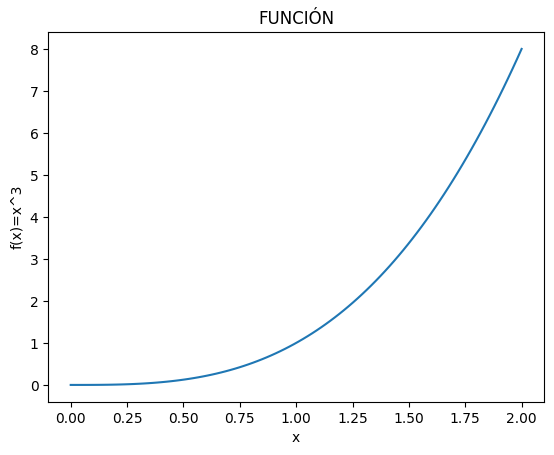

In [397]:
#Gráfica de la función
plt.plot(np.linspace(0,2,100),f(np.linspace(0,2,100)))
plt.xlabel('x')
plt.ylabel('f(x)=x^3')
plt.title('FUNCIÓN')
plt.show()

In [398]:
Iestimada = SumaRiemann(f,0,2,30)
Iestimada

3.2560197530864197

Dibuje el error de la estimaci ́onε=|Iexacta−Iestimada|como una funci ́on den.  Useun array np.linspace(30,400,100, endpoint = Fa)

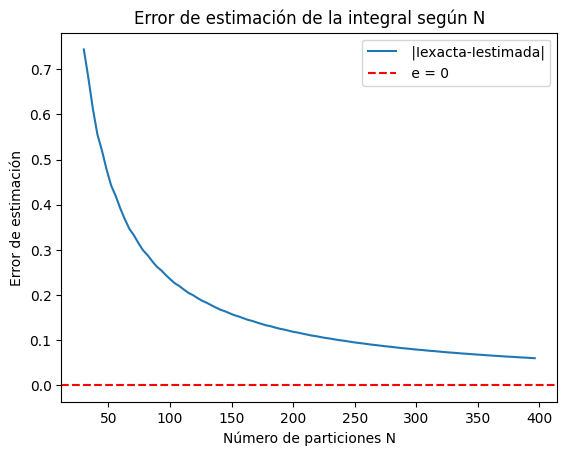

In [399]:
#Error de estimación
import sympy as sp
n = np.linspace(30.,400.,100, endpoint = False)
x = sp.Symbol('x')
Iexacta = sp.integrate(x**3, (x, 0, 2))
e = np.zeros(len(n))
for i in range(len(n)):
  Iestimada = SumaRiemann(f,0,2,n[i])
  e[i] = np.abs(Iexacta-Iestimada)


plt.plot(n,e,label=' |Iexacta-Iestimada|')
plt.axhline(y=0, color='r', linestyle='--', label=' e = 0')
plt.legend()
plt.xlabel('Número de particiones N')
plt.ylabel('Error de estimación')
plt.title('Error de estimación de la integral según N')
plt.show()





f)La estimación de integrales por sumas de Riemann no es la mejor estrategía, si bien es simple de implementar y en algún punto logra hacer una estimación muy cercano al valor real; estas dependen de la cantidad de particiones, donde a mayor particiones existe una mejor estimación, como se logra observar en la gráfica. No obstante, la estimación no es la más exacta. Otros métodos como la cuadratura de Gauss, convergen más rápido y tienen un error menor. Además, se adapta mejor a funciones más complicadas.

Punto 27

In [504]:
#a) Bases canonicas de polinomio grado 8

def G(variables):
  xi =variables[:4]
  w = variables[4:]
  G1 = np.array([
          w[0] + w[1] + w[2] + w[3] - 2,
          w[0] * xi[0] + w[1] * xi[1] + w[2] * xi[2] + w[3] * xi[3],
          w[0] * xi[0]**2 + w[1] * xi[1]**2 + w[2] * xi[2]**2 + w[3] * xi[3]**2 - (2/3),
          w[0] * xi[0]**3 + w[1] * xi[1]**3 + w[2] * xi[2]**3 + w[3] * xi[3]**3,
          w[0] * xi[0]**4 + w[1] * xi[1]**4 + w[2] * xi[2]**4 + w[3] * xi[3]**4 - (2/5),
          w[0] * xi[0]**5 + w[1] * xi[1]**5 + w[2] * xi[2]**5 + w[3] * xi[3]**5,
          w[0] * xi[0]**6 + w[1] * xi[1]**6 + w[2] * xi[2]**6 + w[3] * xi[3]**6 - (2/7),
          w[0] * xi[0]**7 + w[1] * xi[1]**7 + w[2] * xi[2]**7 + w[3] * xi[3]**7
      ])
  return G1


In [505]:
#b) vector
def GetF(G,r):
  return G(r)

In [506]:
#c)Jacobiano 8x8
def GetJacobian(G,r,h=1e-4):

  n = r.shape[0]

  J = np.zeros((n,n))

  for i in range(n):
    for j in range(n):

      rf = r.copy()
      rb = r.copy()

      rf[j] += h
      rb[j] -= h

      J[i,j] = (G(rf)[i] - G(rb)[i])/(2*h)
  return J

In [507]:
#d)Descenso del gradiente
def Metric(G, r):
    return 0.5 * np.linalg.norm(GetF(G, r)) ** 2

In [544]:
r0 = np.random.uniform(-1,1, size=8)
def Minimizer(G, r, lr=1e-2, epochs=70, tol=1e-4):
    metric = Metric(G, r)
    it = 0

    while metric > tol and it < epochs:
        J = GetJacobian(G, r)
        r -= lr * J.T @ GetF(G, r)
        metric = Metric(G, r)
        it += 1
        if metric < 0.005:
            lr = 0.001

    return r, it

In [545]:
solve, it = Minimizer(G, r0)
solve

array([ 0.64345469, -0.35634422,  0.56282704, -0.12139956,  0.25735625,
       -0.01613108,  0.75071957,  0.84812968])

In [546]:
points = solve[:4]
weights = solve[4:]

# Función a integrar
def f(x):
    return np.cos(x)
integral = sum(weights[i] * f(points[i]) for i in range(4))
integral

1.667583125308071

g)Se puede decir que es poco precisa ya que el método utilizado para calcular los los pesos, es el descenso del gradiente. Este método tiene restricciones cuando hay varios minimos locales, puesto que puede caer en este en vez del global. Asimismo, en este caso, al escoger una semilla de manera aleatoria, las soluciones son distintas con precisiones más bajas o altas.

In [423]:
roots, weights = np.polynomial.legendre.leggauss(4)
roots, weights

(array([-0.86113631, -0.33998104,  0.33998104,  0.86113631]),
 array([0.34785485, 0.65214515, 0.65214515, 0.34785485]))

In [424]:
f = lambda x:np.cos(x)
I = np.sum(weights*f(roots))
I

1.6829416886959734

Algoritmo génetico

In [403]:
#a)Vector de cuotas
C= np.array([8.51,10.68,12.24,13.66,15.37,17.15,19.66,24.69])
#Capital de inversión
Ca= 1000000

In [404]:
#b)Función retorno
def Retorno(w,C,Ca):
    return np.min(Ca* (w * C-1))

In [405]:

#c)Algoritmo génetico
class Robot:
    def __init__(self, Retorno, C,rate, Ca,Id=0):

      self.Id = Id
      self.C = C
      self.rate = rate
      self.Ca = Ca
      self.r = np.random.uniform(0.,1., size=self.C.shape[0])
      self.r = self.r / np.sum(self.r)
      self.fitness = Retorno(self.r, self.C, self.Ca)

    def GetR(self): #Pesos
      return self.r

    def Mutate(self):
      self.r += np.random.normal(loc=0., scale=self.rate, size=self.C.shape[0])
      self.r = np.abs(self.r)
      self.r = self.r / np.sum(self.r)

    def SetFitness(self):
      self.fitness = Retorno(self.r,self.C,self.Ca)


    @property
    def Fitness(self):
            return self.fitness

    def mejor(self,epochs):
        for i in range(epochs):
           self.Mutate()
           retorno = Retorno(self.r, self.C, self.Ca)
           if retorno > self.fitness:
            self.fitness = retorno
        return self.r,self.fitness

    def __repr__(self):
            return f"Robot {self.Id}"


In [406]:
def GetRobots(N,rate):
    Robots = []
    for i in range(N):
       r = Robot(Retorno,C, rate, Ca, Id=i)
       Robots.append(r)

    return Robots

In [407]:
    def AlgoritmoGenetico(Robots, epochs=500):
      bestRobot =  None
      bestFitness= -np.inf
      for e in range(epochs):
        for i,robot in enumerate(Robots):
            robot.Mutate()
            robot.SetFitness()
            if robot.Fitness > bestFitness:
               bestFitness = robot.Fitness
               bestRobot = robot
      return bestRobot.GetR(),bestFitness




In [408]:
#f)Estimación de pesos y retorno
N = 500
epochs = 500
rate = 0.1

robots = GetRobots(N, rate)
Ws, RW= AlgoritmoGenetico(robots, epochs)

Ws, RW



(array([0.17543479, 0.16698426, 0.06296114, 0.03881031, 0.46187036,
        0.02803576, 0.03508745, 0.03081593]),
 489117.330059865)

In [412]:
#Comprobación
W = Ws.sum()
W

0.9999999999999999

In [411]:
#g)Dinero invertido en cada opción
Inv = Ws*Ca
Inv

array([175434.79488802, 166984.25608447,  62961.14029313,  38810.31377717,
       461870.35508154,  28035.76009848,  35087.44702969,  30815.93274749])

In [416]:
#Retornos
Retornoi = Inv * C
Retornoi



array([1492950.10449709, 1783391.85498214,  770644.35718791,
        530148.88619618, 7098947.35760324,  480813.28568897,
        689819.20860379,  760845.37953549])

In [417]:
#Retorno min y max
min = np.min(Retornoi)
max = np.max(Retornoi)
min,max

(480813.2856889654, 7098947.357603235)

Con esta opción se ganaría dinero para todas los eventos.